In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.auto import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dakshj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
movies=pd.read_csv("/Users/dakshj/Desktop/IIT KGP/Semesters/Sem 5/Open IIT DATA/archive/netflix_movies_detailed_up_to_2025.csv")
shows=pd.read_csv("/Users/dakshj/Desktop/IIT KGP/Semesters/Sem 5/Open IIT DATA/archive/netflix_tv_shows_detailed_up_to_2025.csv")

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [85]:
import importlib
%run "/Users/dakshj/Desktop/IIT KGP/Semesters/Sem 5/Open IIT DATA/Netflix/helper_functions.py"

# importlib.reload(helper_functions)

# Gap Analysis for movies basedd on Countries:-

In [5]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [6]:
movies.isnull().sum()    

show_id             0
type                0
title               0
director          132
cast              204
country           466
date_added          0
release_year        0
rating              0
duration        16000
genres            107
language            0
description       132
popularity          0
vote_count          0
vote_average        0
budget              0
revenue             0
dtype: int64

In [7]:
# Split the 'country' column on commas and expand into multiple rows
movies = movies.assign(country=movies['country'].str.split(',')).explode('country')

# Clean up any whitespace around country names
movies['country'] = movies['country'].str.strip()

# Reset index for cleanliness
movies = movies.reset_index(drop=True)

In [8]:
movies_country=movies[['show_id','title','country','rating','popularity']]

In [9]:
movies_country.head()

,show_id,title,country,rating,popularity
0,10192,Shrek Forever After,United States of America,6.380,203.893
1,27205,Inception,United Kingdom,8.369,156.242
2,27205,Inception,United States of America,8.369,156.242
3,12444,Harry Potter and the Deathly Hallows: Part 1,United Kingdom,7.744,121.191
4,12444,Harry Potter and the Deathly Hallows: Part 1,United States of America,7.744,121.191


In [10]:
movies_country.isnull().sum()

show_id         0
title           0
country       466
rating          0
popularity      0
dtype: int64

In [11]:
movies_country=movies_country.dropna()

In [12]:
movies_country.isnull().sum()

show_id       0
title         0
country       0
rating        0
popularity    0
dtype: int64

In [13]:
movies_country['country'].value_counts()

country
United States of America                7762
United Kingdom                          1743
France                                  1701
Canada                                  1063
Japan                                    990
                                        ... 
Myanmar                                    1
Zambia                                     1
Malawi                                     1
Guadaloupe                                 1
United States Minor Outlying Islands       1
Name: count, Length: 135, dtype: int64

In [14]:
df=movies_country.copy()
result = (
    df.groupby('country')
      .agg(avg_popularity=('popularity', 'mean'),
           movie_count=('title', 'nunique'))
      .reset_index()
)

In [15]:
result.sort_values(by='avg_popularity',inplace=True,ascending=False)
result.head()

,country,avg_popularity,movie_count
116,St. Kitts and Nevis,318.840000,2
31,Cyprus,78.272000,4
6,Aruba,58.737000,1
88,Netherlands Antilles,58.737000,1
67,Latvia,58.733538,13


In [16]:
temp=result[result['movie_count']>=5]
temp.head()

,country,avg_popularity,movie_count
67,Latvia,58.733538,13
101,Puerto Rico,31.194737,19
90,New Zealand,30.166937,64
19,Bulgaria,28.781917,60
120,Thailand,28.162643,98


In [17]:
# Create interactive scatter plot
fig = px.scatter(
    temp,
    x='movie_count',
    y='avg_popularity',
    color='avg_popularity',
    color_continuous_scale=['#E50914', '#B20710', '#FFFFFF'],  # Netflix red → white
    hover_data={
        'country': True,
        'movie_count': True,
        'avg_popularity': ':.2f',  # two decimal places
    },
    title="Countries on Netflix: Movie Count vs. Average Popularity",
)

# Style the markers
fig.update_traces(
    marker=dict(size=11, line=dict(width=1, color='white')),
    selector=dict(mode='markers'),
    text=None  # no text labels shown directly
)

# Update layout (Netflix-themed)
fig.update_layout(
    width=1000,
    height=650,
    template='plotly_dark',
    title_font=dict(size=22, color='white'),
    xaxis_title='Number of Movies on Netflix',
    yaxis_title='Average Popularity of Their Movies',
    plot_bgcolor='#141414',
    paper_bgcolor='#141414',
    coloraxis_colorbar=dict(title='Avg Popularity', tickfont=dict(color='white')),
)

fig.show()


In [18]:
temp['avg_popularity'].mean()

np.float64(16.801393980713556)

In [19]:
temp['movie_count'].median()

42.0

In [20]:
high_potential = temp[
    (temp['avg_popularity'] > temp['avg_popularity'].mean()) &
    (temp['movie_count'] < temp['movie_count'].median())
]

high_potential.sort_values('avg_popularity', ascending=False).head(10)

,country,avg_popularity,movie_count
67,Latvia,58.733538,13
101,Puerto Rico,31.194737,19
37,Estonia,25.535857,21
76,Malta,24.052750,12
125,United Arab Emirates,23.614028,36
91,Nigeria,22.723500,8
108,Serbia,17.910346,26


In [21]:
df=movies_country.copy()
result = (
    df.groupby('country')
      .agg(avg_rating=('rating', 'mean'),
           movie_count=('title', 'nunique'))
      .reset_index()
)

In [22]:
result.sort_values(by='avg_rating',inplace=True,ascending=False)
result.head()

,country,avg_rating,movie_count
127,United States Minor Outlying Islands,10.000,1
35,Ecuador,8.300,1
45,Ghana,8.100,1
85,Namibia,8.100,1
74,Malawi,7.903,1


In [23]:
temp=result[result['movie_count']>=5]
temp.head()

,country,avg_rating,movie_count
132,Venezuela,7.235714,14
16,Bosnia and Herzegovina,7.220000,5
73,Macedonia,7.169000,6
68,Lebanon,7.022750,8
102,Qatar,6.899250,12


In [24]:
# Create interactive scatter plot
fig = px.scatter(
    temp,
    x='movie_count',
    y='avg_rating',
    color='avg_rating',
    color_continuous_scale=['#E50914', '#B20710', '#FFFFFF'],  # Netflix red → white
    hover_data={
        'country': True,
        'movie_count': True,
        'avg_rating': ':.2f',  # two decimal places
    },
    title="Countries on Netflix: Movie Count vs. Rating",
)

# Style the markers
fig.update_traces(
    marker=dict(size=11, line=dict(width=1, color='white')),
    selector=dict(mode='markers'),
    text=None  # no text labels shown directly
)

# Update layout (Netflix-themed)
fig.update_layout(
    width=1000,
    height=650,
    template='plotly_dark',
    title_font=dict(size=22, color='white'),
    xaxis_title='Number of Movies on Netflix',
    yaxis_title='Average Rating of Their Movies',
    plot_bgcolor='#141414',
    paper_bgcolor='#141414',
    coloraxis_colorbar=dict(title='Avg Rating', tickfont=dict(color='white')),
)

fig.show()


In [25]:
temp['avg_rating'].mean()

np.float64(6.08422977816023)

In [26]:
temp['movie_count'].median()

42.0

In [27]:
high_potential = temp[
    (temp['avg_rating'] > temp['avg_rating'].mean()) &
    (temp['movie_count'] < temp['movie_count'].median())
]

high_potential.sort_values('avg_rating', ascending=False).head(10)

,country,avg_rating,movie_count
132,Venezuela,7.235714,14
16,Bosnia and Herzegovina,7.220000,5
73,Macedonia,7.169000,6
68,Lebanon,7.022750,8
102,Qatar,6.899250,12
37,Estonia,6.568143,21
121,Tunisia,6.565333,6
46,Greece,6.551500,36
20,Cambodia,6.533375,8
62,Kazakhstan,6.514000,6


# Gap Analysis for TV Shows based on Countries:

In [28]:
shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average
0,33238,TV Show,Running Man,안재철,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",South Korea,2010-07-11,2010,8.241,1 Seasons,"Comedy, Reality",ko,A reality and competition show where members a...,1929.898,187,8.241
1,32415,TV Show,Conan,NaN,"Conan O'Brien, Andy Richter",United States of America,2010-11-08,2010,7.035,1 Seasons,"Talk, Comedy, News",en,A late night television talk show hosted by C...,1670.580,229,7.035
2,37757,TV Show,MasterChef Greece,NaN,NaN,Greece,2010-10-03,2010,5.600,1 Seasons,Reality,el,MasterChef Greece is a Greek competitive cooki...,1317.092,6,5.600
3,75685,TV Show,Prostřeno!,NaN,"Václav Vydra, Jana Boušková",Czech Republic,2010-03-01,2010,6.500,1 Seasons,Reality,cs,The knives (and forks) are out as a group of s...,1095.776,6,6.500
4,33847,TV Show,The Talk,NaN,"Amanda Kloots, Jerry O'Connell, Akbar Gbaja-Bi...","United States of America, Ireland",2010-10-18,2010,3.400,1 Seasons,Talk,en,A panel of well-known news and entertainment p...,712.070,12,3.400


In [29]:
shows.isnull().sum()

show_id             0
type                0
title               0
director        10965
cast             1157
country          1797
date_added          0
release_year        0
rating              0
duration            0
genres            974
language            0
description      3206
popularity          0
vote_count          0
vote_average        0
dtype: int64

In [30]:
# Split the 'country' column on commas and expand into multiple rows
shows = shows.assign(country=shows['country'].str.split(',')).explode('country')

# Clean up any whitespace around country names
shows['country'] = shows['country'].str.strip()

# Reset index for cleanliness
shows = shows.reset_index(drop=True)

In [31]:
shows_country=shows[['show_id','title','country','rating','popularity']]

In [32]:
shows_country.head()

,show_id,title,country,rating,popularity
0,33238,Running Man,South Korea,8.241,1929.898
1,32415,Conan,United States of America,7.035,1670.580
2,37757,MasterChef Greece,Greece,5.600,1317.092
3,75685,Prostřeno!,Czech Republic,6.500,1095.776
4,33847,The Talk,United States of America,3.400,712.070


In [33]:
shows_country.isnull().sum()

show_id          0
title            0
country       1797
rating           0
popularity       0
dtype: int64

In [34]:
shows_country=shows_country.dropna()

In [35]:
shows_country.isnull().sum()

show_id       0
title         0
country       0
rating        0
popularity    0
dtype: int64

In [36]:
shows_country['country'].value_counts()

country
United States of America    3194
China                       1900
Japan                       1881
South Korea                 1299
United Kingdom               866
                            ... 
Nicaragua                      1
US Virgin Islands              1
Kyrgyz Republic                1
Algeria                        1
Macao                          1
Name: count, Length: 109, dtype: int64

In [37]:
df=shows_country.copy()
result = (
    df.groupby('country')
      .agg(avg_popularity=('popularity', 'mean'),
           tv_show_count=('title', 'nunique'))
      .reset_index()
)

In [38]:
result.sort_values(by='avg_popularity',inplace=True,ascending=False)
result.head()

,country,avg_popularity,tv_show_count
2,Angola,245.591000,1
63,Nepal,231.868000,1
1,Algeria,196.159000,1
22,Cyprus,184.749400,5
76,Portugal,183.425105,86


In [39]:
temp=result[result['tv_show_count']>=5]
temp.head()

,country,avg_popularity,tv_show_count
22,Cyprus,184.749400,5
76,Portugal,183.425105,86
87,South Africa,183.113446,56
84,Slovakia,130.921400,24
10,Brazil,128.806176,260


In [40]:
# Create interactive scatter plot
fig = px.scatter(
    temp,
    x='tv_show_count',
    y='avg_popularity',
    color='avg_popularity',
    color_continuous_scale=['#E50914', '#B20710', '#FFFFFF'],  # Netflix red → white
    hover_data={
        'country': True,
        'tv_show_count': True,
        'avg_popularity': ':.2f',  # two decimal places
    },
    title="Contries on Netflix: TV Show Count vs. Average Popularity",
)

# Style the markers
fig.update_traces(
    marker=dict(size=11, line=dict(width=1, color='white')),
    selector=dict(mode='markers'),
    text=None  # no text labels shown directly
)

# Update layout (Netflix-themed)
fig.update_layout(
    width=1000,
    height=650,
    template='plotly_dark',
    title_font=dict(size=22, color='white'),
    xaxis_title='Number of TV Shows on Netflix',
    yaxis_title='Average Popularity of Their TV Shows',
    plot_bgcolor='#141414',
    paper_bgcolor='#141414',
    coloraxis_colorbar=dict(title='Avg Popularity', tickfont=dict(color='white')),
)

fig.show()


In [41]:
high_potential = temp[
    (temp['avg_popularity'] > temp['avg_popularity'].mean()) &
    (temp['tv_show_count'] < temp['tv_show_count'].median())
]

high_potential.sort_values('avg_popularity', ascending=False).head(10)


,country,avg_popularity,tv_show_count
22,Cyprus,184.749400,5
87,South Africa,183.113446,56
84,Slovakia,130.921400,24
34,Greece,111.342220,59
20,Croatia,110.319571,14
37,Hungary,92.126621,29
73,Peru,86.561909,11
83,Singapore,84.088355,31
94,Switzerland,73.126708,24
55,Lithuania,72.904200,10


In [42]:
df=shows_country.copy()
result = (
    df.groupby('country')
      .agg(avg_rating=('rating', 'mean'),
           tv_show_count=('title', 'nunique'))
      .reset_index()
)

In [43]:
result.sort_values(by='avg_rating',inplace=True,ascending=False)
result.head()

,country,avg_rating,tv_show_count
77,Qatar,9.20,1
6,Azerbaijan,9.20,1
90,Sri Lanka,9.00,1
52,Lao People's Democratic Republic,8.75,2
35,Guatemala,8.70,2


In [44]:
temp=result[result['tv_show_count']>=5]
temp.head()

,country,avg_rating,tv_show_count
70,Pakistan,7.718182,66
38,Iceland,7.450000,6
78,Romania,7.290909,22
45,Italy,6.875320,147
100,Turkey,6.705081,308


In [45]:
# Create interactive scatter plot
fig = px.scatter(
    temp,
    x='tv_show_count',
    y='avg_rating',
    color='avg_rating',
    color_continuous_scale=['#E50914', '#B20710', '#FFFFFF'],  # Netflix red → white
    hover_data={
        'country': True,
        'tv_show_count': True,
        'avg_rating': ':.2f',  # two decimal places
    },
    title="Contries on Netflix: TV Show Count vs. Average Rating",
)

# Style the markers
fig.update_traces(
    marker=dict(size=11, line=dict(width=1, color='white')),
    selector=dict(mode='markers'),
    text=None  # no text labels shown directly
)

# Update layout (Netflix-themed)
fig.update_layout(
    width=1000,
    height=650,
    template='plotly_dark',
    title_font=dict(size=22, color='white'),
    xaxis_title='Number of TV Shows on Netflix',
    yaxis_title='Average Rating of Their TV Shows',
    plot_bgcolor='#141414',
    paper_bgcolor='#141414',
    coloraxis_colorbar=dict(title='Avg Rating', tickfont=dict(color='white')),
)

fig.show()


In [46]:
high_potential = temp[
    (temp['avg_rating'] > temp['avg_rating'].mean()) &
    (temp['tv_show_count'] < temp['tv_show_count'].median())
]

high_potential.sort_values('avg_rating', ascending=False).head(10)


,country,avg_rating,tv_show_count
38,Iceland,7.450000,6
78,Romania,7.290909,22
87,South Africa,6.646089,56
12,Bulgaria,6.562500,16
34,Greece,6.112000,59
62,Morocco,6.087231,12
37,Hungary,6.069931,29
47,Jordan,6.060000,5
41,Iran,5.922316,19
82,Serbia,5.916760,25


# Text Analytics:-

In [47]:
df_vader=pd.read_csv('/Users/dakshj/Desktop/IIT KGP/Semesters/Sem 5/Open IIT DATA/archive/netflix_movies_detailed_up_to_2025.csv')

In [48]:
df_vader.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [49]:
df_vader.isnull().sum()

show_id             0
type                0
title               0
director          132
cast              204
country           466
date_added          0
release_year        0
rating              0
duration        16000
genres            107
language            0
description       132
popularity          0
vote_count          0
vote_average        0
budget              0
revenue             0
dtype: int64

In [50]:
df_desc=df_vader[['show_id','description']]

In [51]:
df_desc.isnull().sum()

show_id          0
description    132
dtype: int64

In [52]:
df_desc=df_desc.fillna('Unknown description.')

In [53]:
df_desc.isnull().sum()

show_id        0
description    0
dtype: int64

In [54]:
sia=SentimentIntensityAnalyzer()

In [55]:
res={}
for i,row in tqdm(df_desc.iterrows(),total=len(df_desc)):
    show_id=row['show_id']
    description=row['description']
    if(description=='Unknown description.'):
        res[show_id]={'neg':0.0,'neu':1.0,'pos':0.0,'compound':0.0}
    res[show_id]=sia.polarity_scores(description)

  0%|          | 0/16000 [00:00<?, ?it/s]

In [56]:
vaders=pd.DataFrame(res)
vaders=vaders.T
vaders = vaders.reset_index().rename(columns={"index": "show_id"})

In [57]:
vaders.head()

,show_id,neg,neu,pos,compound
0,10192,0.078,0.696,0.226,0.8765
1,27205,0.078,0.851,0.071,-0.3182
2,12444,0.312,0.622,0.066,-0.9561
3,38757,0.138,0.771,0.091,-0.3919
4,10191,0.325,0.675,0.000,-0.9765


In [58]:
df_vader = df_vader.merge(vaders, on="show_id", how="left")

In [59]:
df_vader.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,popularity,vote_count,vote_average,budget,revenue,neg,neu,pos,compound
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,...,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867,0.078,0.696,0.226,0.8765
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,...,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630,0.078,0.851,0.071,-0.3182
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,...,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868,0.312,0.622,0.066,-0.9561
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,...,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732,0.138,0.771,0.091,-0.3919
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,...,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471,0.325,0.675,0.000,-0.9765


In [60]:
df_vader.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'language',
       'description', 'popularity', 'vote_count', 'vote_average', 'budget',
       'revenue', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

In [61]:
def vader_label(comp):
    if comp >= 0.05:
        return "positive"
    elif comp <= -0.05:
        return "negative"
    else:
        return "neutral"

df_vader["sentiment"] = df_vader["compound"].apply(vader_label)

In [62]:
df_vader.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,popularity,vote_count,vote_average,budget,revenue,neg,neu,pos,compound,sentiment
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,...,203.893,7449,6.380,165000000,752600867,0.078,0.696,0.226,0.8765,positive
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,...,156.242,37119,8.369,160000000,839030630,0.078,0.851,0.071,-0.3182,negative
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,...,121.191,19327,7.744,250000000,954305868,0.312,0.622,0.066,-0.9561,negative
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,...,111.762,11638,7.600,260000000,592461732,0.138,0.771,0.091,-0.3919,negative
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,...,110.044,13259,7.800,165000000,494879471,0.325,0.675,0.000,-0.9765,negative


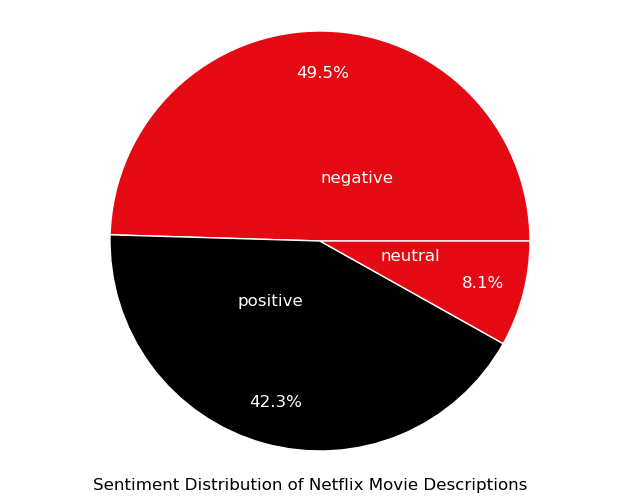

In [63]:
pie_by_count(
    df_vader,
    column='sentiment',
    title='Sentiment Distribution of Netflix Movie Descriptions',
    startangle=0
)

In [99]:
generate_interactive_scatter(
    df_vader,
    y='rating',
    x='compound',
    color='compound',
)

In [64]:
generate_interactive_scatter(
    df_vader,
    y='popularity',
    x='compound',
    color='compound',
)

# Insight:-
Description sentiment has weak linear correlation with popularity. This is expected since popularity is driven by external factors (franchise, cast, recency) more than wording.”

In [67]:
df_vader.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'language',
       'description', 'popularity', 'vote_count', 'vote_average', 'budget',
       'revenue', 'neg', 'neu', 'pos', 'compound', 'sentiment'],
      dtype='object')

In [68]:
df_genre=df_vader[['show_id','genres','sentiment']]

In [71]:
# Split the 'country' column on commas and expand into multiple rows
df_genre= df_genre.assign(genres=df_genre['genres'].str.split(',')).explode('genres')

# Clean up any whitespace around country names
df_genre['genres'] = df_genre['genres'].str.strip()

# Reset index for cleanliness
df_genre = df_genre.reset_index(drop=True)

In [72]:
sent_dist = (
    df_genre
    .groupby(["genres", "sentiment"])
    .size()
    .reset_index(name="count")
)


In [73]:
sent_dist.head()

,genres,sentiment,count
0,Action,negative,2138
1,Action,neutral,179
2,Action,positive,922
3,Adventure,negative,878
4,Adventure,neutral,113


In [74]:
total_per_genre = sent_dist.groupby("genres")["count"].transform("sum")
sent_dist["perc"] = (sent_dist["count"] / total_per_genre) * 100


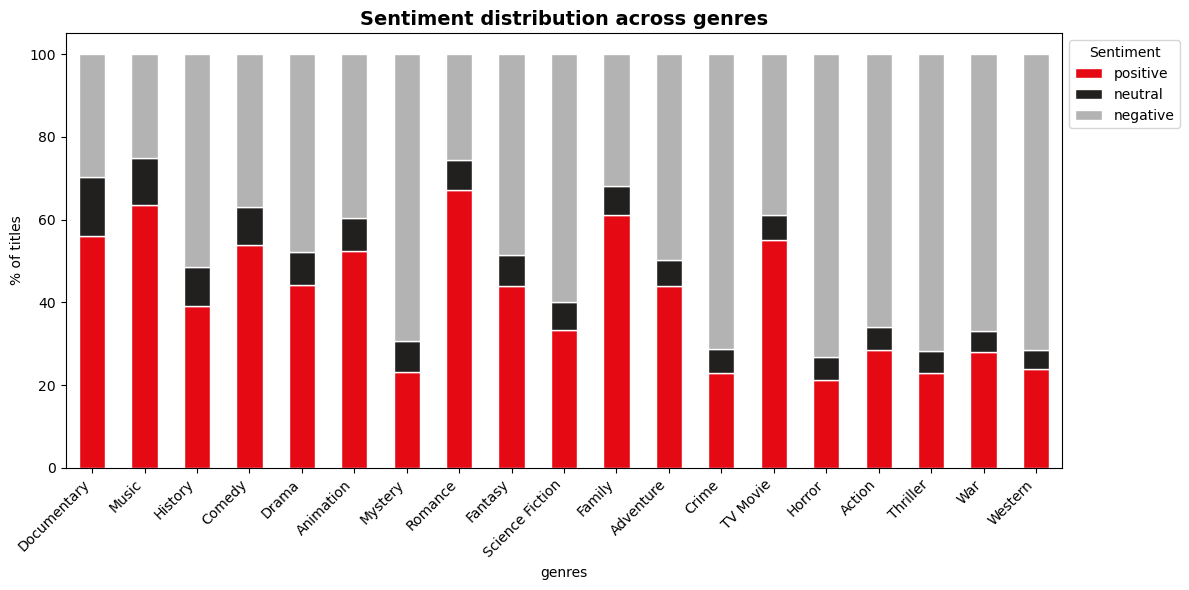

In [86]:
plot_sentiment_by_genre(sent_pivot)


# Insights:-
Sentiment Analysis Across Genres (VADER):- <br>
Applying VADER to title descriptions shows a clear genre-driven pattern. “War”, “Western”, “Action”, and “Thriller” titles have a higher share of negative-leaning descriptions, mainly because their synopses contain conflict words such as fight, war, killer, mission, revenge, crime. In contrast, “Romance”, “Music”, and to some extent “Documentary” show a larger positive segment, as their blurbs tend to use supportive/emotional language like love, journey, celebrates, follows, family. Neutral descriptions are relatively few across all genres, indicating that even short Netflix-style synopses usually contain at least one sentiment-bearing word that pushes the score up or down. Overall, the sentiment we observe is a property of how the genre is written about, not how the genre is received by viewers. Hence, negative sentiment here should be read as “conflict-/threat-heavy description”, not “users dislike this genre.”

In [88]:
df_genre_exploded=df_vader.copy()
# Split the 'country' column on commas and expand into multiple rows
df_genre_exploded= df_genre_exploded.assign(genres=df_vader['genres'].str.split(',')).explode('genres')

# Clean up any whitespace around country names
df_genre_exploded['genres'] = df_genre_exploded['genres'].str.strip()

# Reset index for cleanliness
df_genre_exploded= df_genre_exploded.reset_index(drop=True)

In [100]:
result = (
    df_genre_exploded.groupby('genres')
      .agg(avg_popularity=('popularity', 'mean'),
           avg_sent=("compound", "mean"),
           movie_count=('title', 'nunique'))
      .reset_index()
)

In [90]:
temp=result[result['movie_count']>=5]
temp.head()

,genres,avg_popularity,avg_sent,movie_count
0,Action,32.214458,-0.278298,3194
1,Adventure,35.469354,-0.032890,1752
2,Animation,28.611641,0.101876,1578
3,Comedy,19.418328,0.132875,4497
4,Crime,21.600593,-0.373675,1719


In [92]:
# result has: genres, avg_popularity, avg_sent, movie_count
fig = px.scatter(
    temp,
    x="avg_popularity",
    y="avg_sent",
    size="movie_count",
    color="avg_sent",
    color_continuous_scale=['#E50914', '#B20710', '#FFFFFF'],  # netflix-ish
    hover_data={
        "genres": True,
        "avg_popularity": ":.2f",
        "avg_sent": ":.3f",
        "movie_count": True,
    },
    title="Genres on Netflix: Popularity vs Sentiment (VADER)",
)

# style markers
fig.update_traces(
    marker=dict(line=dict(width=1, color="white")),
    selector=dict(mode="markers"),
)

# layout (dark)
fig.update_layout(
    width=1000,
    height=650,
    template="plotly_dark",
    title_font=dict(size=22, color="white"),
    xaxis_title="Average Popularity",
    yaxis_title="Average Sentiment (compound)",
    plot_bgcolor="#141414",
    paper_bgcolor="#141414",
    coloraxis_colorbar=dict(title="Avg Sentiment", tickfont=dict(color="white")),
)

fig.show()


• Popularity ≠ positivity. Some of the most popular genres sit around 25–35 avg popularity but have neutral to clearly negative average sentiment (bottom-right area). That means darker/conflict-heavy genres still perform well → sentiment is not the primary driver of demand.

• Positive but mid-popular genres exist. A few bubbles in the upper-middle (higher sentiment, mid popularity) suggest there are genres whose descriptions sound “nice” but don’t get as much traction — these are good candidates for better surfacing/promotions.

• High-sentiment + small bubble = under-supplied. Small bubbles high on the y-axis (high avg_sent, low title count) are “pleasantly written but small” genres → catalogue expansion or regional carousels could lift them.

• Overall: genre/content type explains popularity better than description tone; use sentiment mainly for mood tagging / experience, not ranking.

In [102]:
result = (
    df_genre_exploded.groupby('genres')
      .agg(avg_rating=('rating', 'mean'),
           avg_sent=("compound", "mean"),
           movie_count=('title', 'nunique'))
      .reset_index()
)

In [103]:
temp=result[result['movie_count']>=5]
temp.head()

,genres,avg_rating,avg_sent,movie_count
0,Action,6.073126,-0.278298,3194
1,Adventure,6.295425,-0.032890,1752
2,Animation,6.741792,0.101876,1578
3,Comedy,6.073928,0.132875,4497
4,Crime,6.182608,-0.373675,1719


In [104]:
# result has: genres, avg_popularity, avg_sent, movie_count
fig = px.scatter(
    temp,
    x="avg_rating",
    y="avg_sent",
    size="movie_count",
    color="avg_sent",
    color_continuous_scale=['#E50914', '#B20710', '#FFFFFF'],  # netflix-ish
    hover_data={
        "genres": True,
        "avg_rating": ":.2f",
        "avg_sent": ":.3f",
        "movie_count": True,
    },
    title="Genres on Netflix: Rating vs Sentiment (VADER)",
)

# style markers
fig.update_traces(
    marker=dict(line=dict(width=1, color="white")),
    selector=dict(mode="markers"),
)

# layout (dark)
fig.update_layout(
    width=1000,
    height=650,
    template="plotly_dark",
    title_font=dict(size=22, color="white"),
    xaxis_title="Average Rating",
    yaxis_title="Average Sentiment (compound)",
    plot_bgcolor="#141414",
    paper_bgcolor="#141414",
    coloraxis_colorbar=dict(title="Avg Sentiment", tickfont=dict(color="white")),
)

fig.show()


• No strong linear link. Genres with higher user ratings (right side, ~6.4–6.8) are not consistently the ones with more positive descriptions — some of them still sit around 0 or even slightly negative sentiment. So viewers don’t reward “happy-sounding” descriptions directly.

• Well-rated dark genres exist. There are bubbles in the 6.0–6.3 rating band with clearly negative sentiment (below 0). That means genres with conflict/crime/serious themes can still get good audience scores — tone of description ≠ quality.

• Best quadrant to grow: top-right (higher rating, positive sentiment) has only a few bubbles and many of them are small → not many titles live there. That’s a “make more of this” space: genres that people rate well and that are described in an appealing / positive way.

• Conclusion: IMDB/user rating seems to be driven more by content quality / genre than by the wording/sentiment of the synopsis. Sentiment is better used as a mood tag than a predictor of rating.